<ipython-input-54-5c6446894393>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, f, LineWidth=1, label=f"without_1 raw")


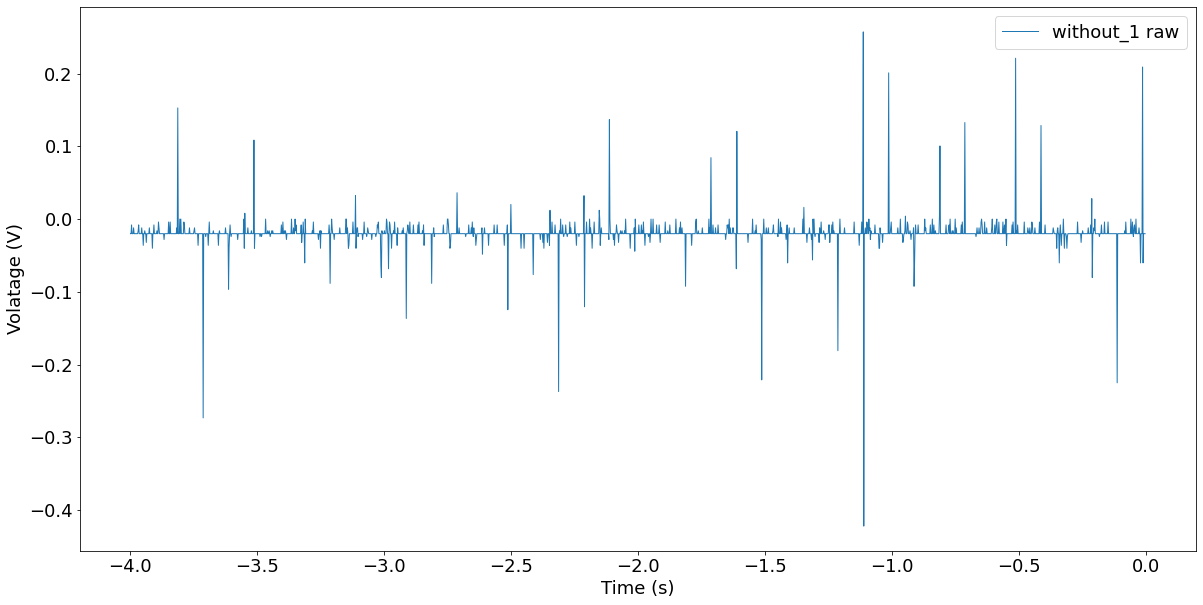

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.new_scatter import csv_format

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 18})

# give path to data
scope_num = 0
data = f'data/Lab_2/scope_{scope_num}.csv'

csv_format(data)
df = pd.read_csv(data, delimiter=',', skiprows=0)

# initialise data for anaysis
dt = 1
t = df['x_axis']
f = df['channel_2']  

plt.plot(t, f, LineWidth=1, label="scope_0 raw")
plt.xlabel('Time (s)')
plt.ylabel('Volatage (V)')
plt.legend()

# save raw scope as png in data/plots
image_path = f'data/Plots/Lab_2/scope_{scope_num}.png'
plt.savefig(image_path, dpi=300, bbox_inches='tight', transparent=False)